**Normalizing Flows for Lattice Field Theory**
----

>Code courtesy: 100% of the code is taken from the paper [Introduction to Normalizing Flows for Lattice Field Theory](https://arxiv.org/abs/2101.08176).

Given below is a snippet from the same paper.
![picture](https://drive.google.com/uc?export=view&id=1axWOeSJC7j4WOwnBLIyNIiCYQySmyVAi)
In this tutorial, we will consider the map $f: z \to \phi$, contrary to the convention above.


Consider a Neural Network that we want to train, to obtain a target output  $\phi$ with a probability distribution function
$$P[\phi] = \frac{1}{Z}e^{-S[\phi]} = \frac{1}{Z} \exp\big( - \int d^dx (\partial_\mu \phi(x) )^2 + m^2 \phi(x)^2 + \lambda \phi(x)^4 \big).$$
$Z$ is the partition function or the overall normalization of this theory. Here, $d$ is the dimension of a lattice of inputs for this Neural Network. In scalar field theory language, this lattice is discretized (Euclidean) space-time. For simplicity, let us consider the case $d=2$, then the target output density is given as
$$P_{\text{lattice}}[\phi] = \frac{1}{Z} e^{-S_{\text{lattice}}[\phi]} \\
= \frac{1}{Z} \exp \Big( - \sum_{\vec{n}} \phi(\vec{n}) \Big[\sum_{\mu \in \{1,2 \} } 2\phi(\vec{n}) - \phi(\vec{n} + {\mu} ) - \phi(\vec{n}- {\mu}) \Big] + m^2 \phi(\vec{n})^2 + \lambda \phi(\vec{n})^4 \Big). $$
The $2$ dimensional lattice of inputs is given as $L_x \times L_y$, with number of lattice sites $\vec{n} = (n_x,n_y)$. The field $\phi(\vec{n})$ is defined only on the lattice sites, and $n_x,n_y$ are integers. Lattice spacing is taken as $1$, in appropriate units.

The Neural Network takes in lattice points $x ,y \in \{L_x, L_y\}$, and trainable priors (a.k.a. stochastic parameters) $z$. Let $r(z)$ denote the prior density. The actual output density of this Network is denoted by $Q[\phi]$. *Normalizing Flows* $f: z \to \phi$ are differentiable and invertible maps from the space of priors to the space of outputs.

* Let us choose the convention that $L_x = L_y = L$, and $n_x, n_y \in [0, L-1]$.
* Let us also introduce alternate notions $P[\phi]:= P(\alpha)$ and $Q[\phi] := Q(\alpha)$ for the target density and actual output density, respectively.
* Neural Network output $\alpha$ is a random variable, which in this case, corresponds to the value of the scalar field $\phi(\vec{n})$ evaluated on a single lattice site in $2$ dimensions.
* Notations $\phi(\vec{n})$ and $\phi_{\vec{n}}$ respectively denote the field configuration that lives on the sites of the lattice, and the unraveled one-dimensional vector of lattice degrees of freedom.
* Field $\phi(\vec{n}):= \phi_1(\vec{n}_x) \times \phi_2(\vec{n}_y)$ can be thought of as some $(L \times L)$ dimensional tensor.
* Field action $S_{\text{lattice}}[\phi] \in \mathbb{R}$, and the path integral measure is a product over discretized ones $D\phi(\vec{n}) = \prod_{\vec{n}} d \phi_{\vec{n}}$.  
* The partition function $Z = \int \prod_{\vec{n}} d\phi(\vec{n}) \, e^{- S_{\text{lattice}}[\phi]}$ is difficult to calculate, and obtaining the target density $P_{\text{lattice}}[\phi]$ up to some arbitrary constant is fine, for this tutorial.
* *There is a curse of dimensionality here*. The dimensionality of the field density depends on the number of lattice sites, and grows with the volume of the lattice.

*Reguralizing the scalar field theory on such a $2$ dimensional lattice, with one real degree of freedom per each lattice site, lets us access the non-perturbative physics in the strong coupling regime of the same theory.*

**Let us introduce Normalizing Flows**
----
*A normalizing flow describes the transformation of a probability density through a sequence of invertible, differentiable mappings.*

Any invertible, differentiable function $f(z)$ will transform the prior density $r(z)$ on random variable $z$ to a output density $Q(x):= Q(\alpha)$ on variable $\alpha = f(z)$; both $z$ and $\alpha$ can be multi-dimensional random variables.
* Let $f^{-1} = g$, then $z = g \circ f(z)$.
* The normalizing flow $f$ induces a change of variable(s) from $z$ to $\alpha$.
* The output density $Q(\alpha)$ can be obtained from $r(z)$, if we can compute the Jacobian factor $J(z) = \big|\det_{kl} \partial f(z_k)/\partial z_l \big|$ for this transformation. $$Q(\alpha) = r(z)\big[ J(z)\big]^{-1} = r(z) \Bigg|\det_{kl} \frac{\partial f_k(z)}{\partial z_l} \Bigg|^{-1} $$

**Let us introduce Coupling Layers**
----

An invertible, differentiable expressive function $f$ can be constructed as a composition of multiple simpler invertible, differentiable functions $f_i$
$$f = f_k \circ f_{k-1} \circ \cdots f_1.$$
Coupling layers are one of the approaches to define the simpler mappings $f_i$, in a way such that only a subset of the input variables are updated through each $f_i$, conditioned on the complimentary ("frozen") subset.
* As a simple example, if the inputs to a set of coupling layers is a lattice with one real number per each lattice site, then the first two coupling layers $f_1$ and $f_2$ can be designed to update only the even and odd sites, respectively.
* The transformation applied by each coupling layer is manifestly invertible, e.g. a scaling transformation $x \to e^s x$, or an affine transformation $x \to e^s x + t$.
* Next, a coupling layer generating outputs $x_1', x'_2 = f_i(x_1,x_2)$ via a scaling transformation is defined below
$$x'_1 = e^{s(x_2)} x_1, \\
x'_2 = x_2, $$ where $x_1, x_2$ are subsets of the layer input $x$.
* The coupling layer in the above example keeps $x_2$ frozen, and $x_1$ is updated based on frozen $x_2$.
* The product in $e^{s(x_2)}x_1$ is elementwise, and $e^{s(x_2)}$ is defined elementwise on $x_2$, and therefore, has the same shape as $x_1$.
* The transformation inducing parameters in $s(x_2)$ can be complicated non-invertible functions of frozen $x_2$.
* Such choices are not a problem as the inverse transformation can easily be defined, using the same functions $s(x_2)$, as
$$x_1 = e^{-s(x'_2)} x'_1, \\
x_2 = x'_2. $$
* The Jacobian of the forward transformation
$$J_{\text{forward}}(x) = \Bigg|\det_{kl} \frac{\partial \big[ f_i(x_1, x_2) \big]_k }{\partial x_l} \Bigg| = \prod_k e^{[s(x_2)]_k} ,$$
is the inverse of the Jacobian of the reverse transformation associated with $f^{-1}_{i}$, i.e. $J_{\text{reverse}}(x') = 1/J_{\text{forward}}(x)$.

*The Jacobian for the normalizing flow $f$ is obtained by composing all Jacobians of all coupling layers together, $$Q(\alpha) = r(z)\prod_{i=1}^{k} J_{i}^{-1}(z) = r(z) \Bigg|\det \frac{\partial f(z)}{\partial z} \Bigg|^{-1} .$$*



**Coupling Layers for Scalar Field Theory on $2$D Lattice**
---

Previously, we defined scalar field theory on a $2$ dimensional lattice of size $L \times L$. We will now define coupling layers for this problem, such that the real degrees of freedom on each lattice site $\phi$ can be divided into two subsets $\phi_1, \phi_2$, and the coupling layers will induce affine and / or scaling transformations on one subset, while keeping the other frozen.

We choose the same set of affine transformations as before. Then, each coupling layer of the form $f_i: (\phi_1, \phi_2) \mapsto (\phi_1' , \phi_2') $ induces the following transformation
$$ \phi'_1 = e^{s(\phi_2)}\phi_1 + t(\phi_2), \\
\phi'_2 = \phi_2,$$
on its inputs. The inverse of this layer is given by $f_i^{-1}(\phi'_1, \phi'_2) = \big( (\phi'_1 - t(\phi'_2) )\, e^{-s(\phi'_2) } , \phi'_2 \big) .$
* Here, $s(\phi_2), t(\phi_2)$ are vectors of the same size as $\phi_1$, and all operations are elementwise.
* Later, we will define functions $s,t$ using Neural Networks.
* The logarithm of Jacobians for $f_i$ (forward) and its inverse $f^{-1}_{i}$ (reverse) transformations are respectively
$$\log J_{\text{forward}}(\phi) = \sum_k \big[s(\phi_2) \big]_k, \\
\log J_{\text{reverse}}(\phi') = \sum_k - \big[s(\phi'_2) \big]_k. $$
* For implimentations in Neural Networks, we will define subsets $\phi_1, \phi_2$ using a mask $m(\vec{n}) \in \{0,1 \}$. When $m(\vec{n})=1$, $\phi_1$ is updated using functions $s,t$, while $\phi_2$ is kept frozen.


**KL Divergence Loss for Normalizing Flow**
----
Once we implement the coupling layers $f_i$ for scalar field theory on a $2$ dimensional lattice using a Neural Network, it will result in output distribution $Q[\phi']$ on transformed variable $\phi'$. A priori, there is no reason to believe that $Q[\phi']$ would be close to target scalar field density $P_{\text{lattice}}[\phi']$ on $\phi'$. We need a good loss function to minimize the differences between the approximate and true distributions $Q[\phi']$ and $P_{\text{lattice}}[\phi']$, respectively.

Recall [Tutorial 3.1 KL_divergence.ipynb](https://github.com/iaifi/summer-school-2023/blob/main/Tutorial%203.1%20KL_divergence.ipynb) from earlier today. Target output data $\phi'$ from target distribution $P_{\text{lattice}}[\phi']$ can be scarce, which may pose a problem to training. To avoid this, we define the reverse Kullback-Leibler diveregnce between $Q[\phi']$ and $P_{\text{lattice}}[\phi']$, under the assumption that output $\phi'$ is a continuous random variable. Then, the reverse KL divergence loss is
$$D_{KL}(Q||P_{\text{lattice}}) = \int d\phi \, Q(\phi') \big( \log Q(\phi') - \log P_{\text{lattice}}(\phi')  \big) .$$
Actual outputs $\phi'$ from the coupling layers would be discrete multidimensional random variables. Then, a trainable KL divergence loss would require some modifications of the above equation.

Let's redefine the reverse KL divergence for approximate and true distributions $Q[\phi']$ and $P_{\text{lattice}}[\phi']$ as
$$\tilde{D}_{KL}(Q||P_{\text{lattice}}) = \frac{1}{N} \sum_{i=1}^{N} \big( \log Q[\phi'_i]  - \log P_{\text{lattice}}[\phi'_i] \big) ,$$
for $N$ samples $\phi'_i$ drawn from target distribution $P_{\text{lattice}}$. A problem with this choice may be the mode-seeking or zero-forcing behavior of reverse KL diveregnce, we will not discuss it here.


**Effective Sample Size**
---

Defined below is Effective Sample Size or ESS for a batch of samples $\phi'_i$. It's a measure of the model quality that does not require overall normalization of $P_{\text{lattice}}[\phi']$,
$$ESS = \frac{\Big(\frac{1}{N}\sum_i \frac{ P_{\text{lattice}}[\phi'_i] }{ Q[\phi'_i]} \Big)^2 }{ \frac{1}{N}\sum_i \Big( \frac{ P_{\text{lattice}}[\phi'_i] }{ Q[\phi'_i]} \Big)^2 } .$$
It can be seen that ESS lies in the range $[0,1]$; larger values indicate better effective sampling, and a perfect value of $ESS = 1$ indicates perfect independent draw from target distribution $P_{\text{lattice}}$ for each sample.

ESS is a noisier quantity than KL divergence, and therefore, is not used as a loss function.



**It's time to implement everything in codes.**
----

At this point, we will import all requires libraries, and define functions that we may need to call at a later point.

In [2]:
# import libraries
import base64
import io
import pickle
import numpy as np
import torch
print(f'TORCH VERSION: {torch.__version__}')
import packaging.version
if packaging.version.parse(torch.__version__) < packaging.version.parse('1.5.0'):
    raise RuntimeError('Torch versions lower than 1.5.0 not supported')

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# set up environmet for pytorch
if torch.cuda.is_available():
    torch_device = 'cuda'
    float_dtype = np.float32 # single
    torch.set_default_tensor_type(torch.cuda.FloatTensor)
else:
    torch_device = 'cpu'
    float_dtype = np.float64 # double
    torch.set_default_tensor_type(torch.DoubleTensor)
print(f"TORCH DEVICE: {torch_device}")

# define two functions for mod and remainder
def torch_mod(x):
    return torch.remainder(x, 2*np.pi)
def torch_wrap(x):
    return torch_mod(x+np.pi) - np.pi

# a function to detach tensors from the computational graph and pull them to CPU as a numpy array
def grab(var):
    return var.detach().cpu().numpy()

#####
# the set of functions defined below make a live-updating plot during training
from IPython.display import display

def init_live_plot(dpi=125, figsize=(8,4)):
    fig, ax_ess = plt.subplots(1,1, dpi=dpi, figsize=figsize)
    plt.xlim(0, N_era*N_epoch)
    plt.ylim(0, 1)

    ess_line = plt.plot([0],[0], alpha=0.5) # dummy
    plt.grid(False)
    plt.ylabel('ESS')

    ax_loss = ax_ess.twinx()
    loss_line = plt.plot([0],[0], alpha=0.5, c='orange') # dummy
    plt.grid(False)
    plt.ylabel('Loss')

    plt.xlabel('Epoch')

    display_id = display(fig, display_id=True)

    return dict(
        fig=fig, ax_ess=ax_ess, ax_loss=ax_loss,
        ess_line=ess_line, loss_line=loss_line,
        display_id=display_id
    )

def moving_average(x, window=10):
    if len(x) < window:
        return np.mean(x, keepdims=True)
    else:
        return np.convolve(x, np.ones(window), 'valid') / window

def update_plots(history, fig, ax_ess, ax_loss, ess_line, loss_line, display_id):
    Y = np.array(history['ess'])
    Y = moving_average(Y, window=15)
    ess_line[0].set_ydata(Y)
    ess_line[0].set_xdata(np.arange(len(Y)))
    Y = history['loss']
    Y = moving_average(Y, window=15)
    loss_line[0].set_ydata(np.array(Y))
    loss_line[0].set_xdata(np.arange(len(Y)))
    ax_loss.relim()
    ax_loss.autoscale_view()
    fig.canvas.draw()
    display_id.update(fig) # need to force colab to update plot
#####

TORCH VERSION: 2.0.1+cu118
TORCH DEVICE: cpu


**Exercise 0: Compute the Jacobian for the transformation $f:(Z_1, Z_2) \to (U_1, U_2)$ where $$Z_1 = \sqrt{-2 \ln U_1}\cos(\pi U_2), \\ Z_2 = \sqrt{-2 \ln U_1}\sin(\pi U_2).$$**
---


**Solution (to be remove before GitHub upload): $\frac{\pi}{U_1}.$**
---




**Exercise 1: Sample $U_1, U_2 \sim \text{unif}(0,1)$ for a batch size of $2^{12}$. Write a code in python to plot transformed variables $Z_2$ against $Z_1$, and original variables $U_2$ against $U_1$, separately.**
---

**Solution (to be removed before GitHub upload)**
----

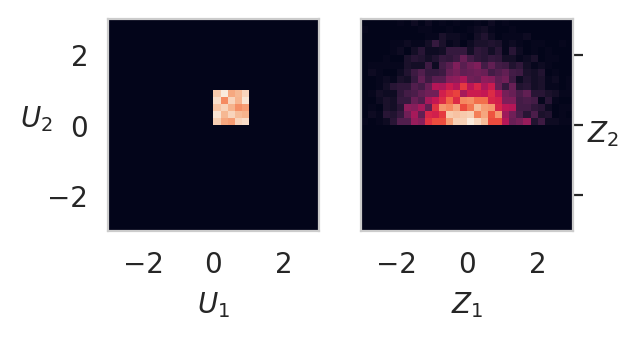

In [ ]:
batch_size = 2**12
u = np.random.random(size=(batch_size, 2))
z = np.sqrt(-2*np.log(u[:,0]))[:,np.newaxis] * np.stack(
    (np.cos(np.pi*u[:,1]), np.sin(np.pi*u[:,1])), axis=-1)

fig, ax = plt.subplots(1,2, dpi=200, figsize=(3,3))
for a in ax:
    a.set_xticks([-2, 0, 2])
    a.set_yticks([-2, 0, 2])
    a.set_aspect('equal')
ax[0].hist2d(u[:,0], u[:,1], bins=30, range=[[-3.0,3.0], [-3.0,3.0]])
ax[0].set_xlabel(r"$U_1$")
ax[0].set_ylabel(r"$U_2$", rotation=0, y=.46)
ax[1].hist2d(z[:,0], z[:,1], bins=30, range=[[-3.0,3.0], [-3.0,3.0]])
ax[1].set_yticklabels([])
ax[1].set_xlabel(r"$Z_1$")
ax[1].set_ylabel(r"$Z_2$", rotation=0, y=.53)
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
plt.show()

**Next, let us implement a simple Coupling Layer using a feedforward Neural Network.**
---

Consider two random variables $x_1, x_2 \sim \text{unif}[0,1)$, and a map $f: (x_1, x_2) \to (x'_1, x'_2)$ with
$$x'_1 = e^{s(x_2)} x_1, \\
x'_2 = x_2.$$

* First, we define the coupling layer as a class called ```SimpleCouplingLayer```. There are two different functions in this class, one of them is $f: (x_1, x_2) \to (x'_1, x'_2)$, called ```forward(self, x)```, and the other one is its inverse ```reverse(self, fx)```. Here, ```fx``` is the transformed output $f(x_1, x_2)$.
* Then, priors are initialized in a way to give interesting behaviour without training.
* Next, we evaluate $f(x_1, x_2)$, and $f^{-1}\big(f(x_1, x_2) \big)$.
* Lastly, we plot (a)  $(x_1, x_2)$, (b) $f(x_1, x_2)$, and (c) $f^{-1}\big(f(x_1, x_2) \big)$ in three different plots.


**Exercise 2: Write a function ```reverse(self, fx)``` in the class ```SimpleCouplingLayer``` to return $f^{-1}\big(f(x_1, x_2) \big)$. If it is properly defined, the plots (a) and (c) in the last step of this example would be identical.**
---

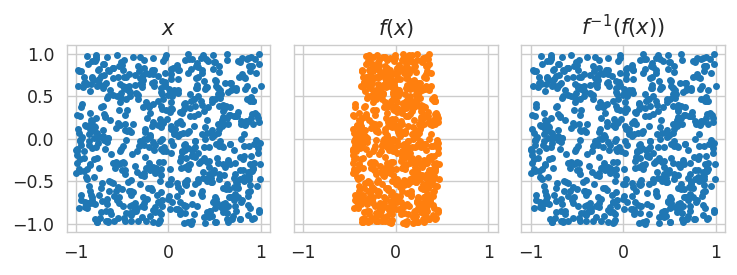

In [4]:
# let's first define the class for the Coupling Layer

class SimpleCouplingLayer(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.s = torch.nn.Sequential(
            torch.nn.Linear(1, 8),
            torch.nn.ReLU(),
            torch.nn.Linear(8, 8),
            torch.nn.ReLU(),
            torch.nn.Linear(8, 1),
            torch.nn.Tanh()
        )

    # the map f: x --> x' is defined below
    def forward(self, x):
        x1, x2 = x[:,0], x[:,1]
        s = self.s(x2.unsqueeze(-1)).squeeze(-1)
        fx1 = torch.exp(s) * x1
        fx2 = x2
        logJ = s
        return torch.stack((fx1, fx2), dim=-1), logJ


    # Solution for exercise 2 (to be removed before GitHub upload)
    def reverse(self, fx):
        fx1, fx2 = fx[:,0], fx[:,1]
        x2 = fx2
        s = self.s(x2.unsqueeze(-1)).squeeze(-1)
        logJ = -s
        x1 = torch.exp(-s) * fx1
        return torch.stack((x1, x2), dim=-1), logJ

coupling_layer = SimpleCouplingLayer()

# init weights in a way that gives interesting behavior without training
def set_weights(m):
    if hasattr(m, 'weight') and m.weight is not None:
        torch.nn.init.normal_(m.weight, mean=1, std=2)
    if hasattr(m, 'bias') and m.bias is not None:
        m.bias.data.fill_(-1)
torch.manual_seed(1234)
coupling_layer.s.apply(set_weights);

# we generate x, f(x), and f^{-1} (f(x))
batch_size = 750
np_x = (2*np.random.random(size=(batch_size, 2)) - 1).astype(float_dtype)
x = torch.from_numpy(np_x).to(torch_device)

gx, fwd_logJ = coupling_layer.forward(x)
xp, bwd_logJ = coupling_layer.reverse(gx)

# lastly, we plot x, f(x), and f^{-1} (f(x)). Expect first and last plots to be identical.
fig, ax = plt.subplots(1,3, dpi=125, figsize=(6,2.3), sharex=True, sharey=True)
np_gx, np_xp = grab(gx), grab(xp)
for a in ax:
    a.set_xlim(-1.1,1.1)
    a.set_ylim(-1.1,1.1)
ax[0].scatter(np_x[:,0], np_x[:,1], marker='.')
ax[0].set_title(r'$x$')
ax[1].scatter(np_gx[:,0], np_gx[:,1], marker='.', color='tab:orange')
ax[1].set_title(r'$f(x)$')
ax[2].scatter(np_xp[:,0], np_xp[:,1], marker='.')
ax[2].set_title(r"$f^{-1}(f(x))$")
fig.set_tight_layout(True)
plt.show()

**Next, let us encode the $2$D scalar field theory on lattice.**
---

Let us go step by step.
* First, we will define a $8 \times 8$  lattice, and randomly initialize $\phi(\vec{n})$ on each lattice site, as a real number drawn from Gaussian distribution $\text{Normal}(0,1)$.
* There are two independent field configurations $\phi_1, \phi_2$ in two orthogonal directions. We will call this scalar field $\vec{\phi} = \phi_1 \times \phi_2$, defined over all lattice sites, as ```cfgs```.
* Then, we will define a class called ```ScalarPhi4Action``` to compute and return scalar field theory action $S_{\text{lattice}}[\phi]$, given each $\phi(\vec{n})$. This class takes in the values for scalar field mass $m$ and quartic coupling constant $\lambda$.

**Exercise 3: Write a callable object in class ```ScalarPhi4Action``` that will evaluate actions  $S_{\text{lattice}}[\phi_1], S_{\text{lattice}}[\phi_2]$ for each independent field configuration, and return them in an array format. Note that each $S_{\text{lattice}}[\phi_i]$ is a scalar.**
----

In [ ]:
# first, we define a 8x8 lattice
L = 8
lattice_shape = (L,L)

# then, we initialize a real values d.o.f. on each lattice site. Overall, these are two independent field configurations.
phi_ex1 = np.random.normal(size=lattice_shape).astype(float_dtype)
phi_ex2 = np.random.normal(size=lattice_shape).astype(float_dtype)
cfgs = torch.from_numpy(np.stack((phi_ex1, phi_ex2), axis=0)).to(torch_device)

# here, we define a class to return the action for each real d.o.f. on each lattice site.
class ScalarPhi4Action:
    def __init__(self, M2, lam):
        self.M2 = M2
        self.lam = lam

    # Solution to Exercise 3 (to be removed before GitHub upload)
    def __call__(self, cfgs):
        # potential term
        action_density = self.M2*cfgs**2 + self.lam*cfgs**4
        # kinetic term (discrete Laplacian)
        Nd = len(cfgs.shape)-1
        dims = range(1,Nd+1)
        for mu in dims:
            action_density += 2*cfgs**2
            action_density -= cfgs*torch.roll(cfgs, -1, mu)
            action_density -= cfgs*torch.roll(cfgs, 1, mu)
        return torch.sum(action_density, dim=tuple(dims))

# We can choose different values for square of mass and the quartic coupling.
M2 = -4.0
lam = 8.0
phi4_action = ScalarPhi4Action(M2=M2, lam=lam)
print(phi4_action(cfgs))

tensor([1296.7954, 1508.7099])


* Next, we will define a class ```SimpleNormal``` that initializes priors drawn from uncorrelated Gaussian distributions.
* Using this, we will generate priors for this $8 \times 8$ lattice.
* Lastly, we will use ```draw``` function, defined in the beginning, to acquire samples from this prior and plot them.  

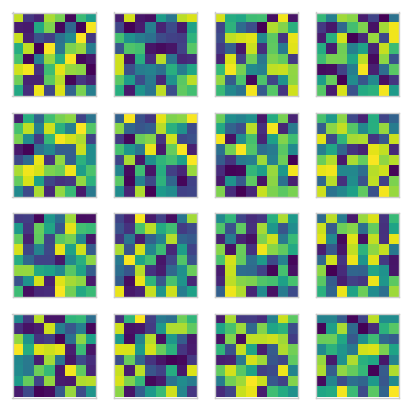

In [ ]:
# first, let's define a class for uncorrelated Gaussians for prior distributions
class SimpleNormal:
    def __init__(self, loc, var):  # attributes 'loc' and 'var' determine the shape of the samples drawn
        self.dist = torch.distributions.normal.Normal(
            torch.flatten(loc), torch.flatten(var))
        self.shape = loc.shape
    def log_prob(self, x):
        logp = self.dist.log_prob(x.reshape(x.shape[0], -1))
        return torch.sum(logp, dim=1)
    def sample_n(self, batch_size):
        x = self.dist.sample((batch_size,))
        return x.reshape(batch_size, *self.shape)

# we use this to initialize the priors on the lattice
prior = SimpleNormal(torch.zeros(lattice_shape), torch.ones(lattice_shape))

# draw samples from this prior and plot them
torch_z = prior.sample_n(1024)
z = grab(torch_z)

fig, ax = plt.subplots(4,4, dpi=125, figsize=(4,4))
for i in range(4):
    for j in range(4):
        ind = i*4 + j
        ax[i,j].imshow(np.tanh(z[ind]), vmin=-1, vmax=1, cmap='viridis')
        ax[i,j].axes.xaxis.set_visible(False)
        ax[i,j].axes.yaxis.set_visible(False)
plt.show()

* Given below is a code to plot two-way histograms between lattice sites. The plots show that the priors are uncorrelated.

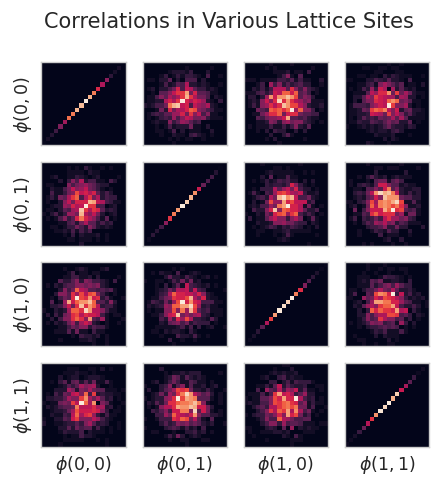

In [ ]:
fig, ax = plt.subplots(4,4, dpi=125, figsize=(4,4))
for x1 in range(2):
    for y1 in range(2):
        i1 = x1*2 + y1
        for x2 in range(2):
            for y2 in range(2):
                i2 = x2*2 + y2
                ax[i1,i2].hist2d(z[:,x1,y1], z[:,x2,y2], range=[[-3,3],[-3,3]], bins=20)
                ax[i1,i2].set_xticks([])
                ax[i1,i2].set_yticks([])
                if i1 == 3:
                    ax[i1,i2].set_xlabel(rf'$\phi({x2},{y2})$')
                if i2 == 0:
                    ax[i1,i2].set_ylabel(rf'$\phi({x1},{y1})$')
fig.suptitle("Correlations in Various Lattice Sites")
plt.show()

* Finally, we evaluate scalar field theory action $S_{\text{lattice}}[z]$ on these uncorrelated priors as
$$S_{\text{lattice}}[z] = \sum_{\vec{n}} z(\vec{n}) \Big[\sum_{\mu \in \{1,2 \} } 2z(\vec{n}) - z(\vec{n} + {\mu} ) - z(\vec{n}- {\mu}) \Big] + m^2 z(\vec{n})^2 + \lambda z(\vec{n})^4,$$
and compare it against the actual action associated with prior distribution $r(z)$. The actual action is given as $S_{\text{eff}} = - \log r(z)$. The plot shows differences between the actual and scalar field theory actions on $z$.


slope 1 linear regression S = -logr + 1455.4647


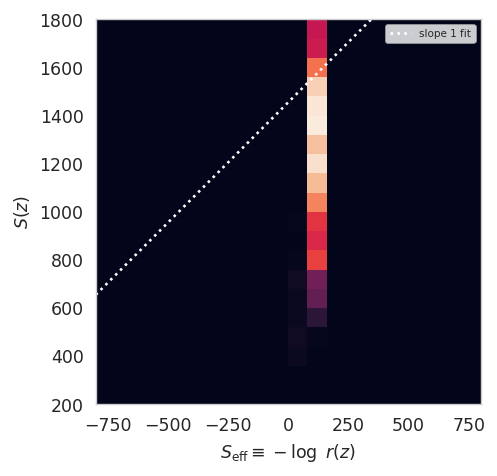

In [ ]:
S_eff = -grab(prior.log_prob(torch_z))
S = grab(phi4_action(torch_z))
fit_b = np.mean(S) - np.mean(S_eff)
print(f'slope 1 linear regression S = -logr + {fit_b:.4f}')
fig, ax = plt.subplots(1,1, dpi=125, figsize=(4,4))
ax.hist2d(S_eff, S, bins=20, range=[[-800, 800], [200,1800]])
xs = np.linspace(-800, 800, num=4, endpoint=True)
ax.plot(xs, xs + fit_b, ':', color='w', label='slope 1 fit')
ax.set_xlabel(r'$S_{\mathrm{eff}} \equiv -\log~r(z)$')
ax.set_ylabel(r'$S(z)$')
ax.set_aspect('equal')
plt.legend(prop={'size': 6})
plt.show()

## The prior distribution is expected to change due to training, such that the slope of this plot would become $\sim 1$.


**Next, let us encode affine Coupling Layers for this lattice field theory problem.**
---

The steps are given below.
* We start by designing a checkerboard masking for $m(\vec{n}) \in \{0,1 \}$, defined earlier in the tutorial.
* Then, we define a class ```AffineCoupling``` for transformations given by $f: \phi \to \phi^{-1}$ and its inverse transformation $f^{-1}$.
* Later, when we will set up affine transformations on priors on the $2$D lattice using Neural Networks, we will let functions $s(\phi_2), t(\phi_2)$ transform both $\phi_2$ and $\phi_1$, and then use the masking to get
$$ \phi'_1 = e^{s(\phi_2)}\phi_1 + t(\phi_2), \\
\phi'_2 = \phi_2.$$
* A single Neural Network will be used to define both $s,t$. The shared parameters in $s$ amd $t$ do not add to formal complexities.
* We will use Convolutional Neural Nets for this $2$D lattice field theory problem. The implementation of Pytorch's $2$D CNNs require inputs in the shape ```(batch_size, n_input_channels, L_x, L_y)```.
* To ensure that, we use ```.unsqueeze(1)``` in the class ```AffineCoupling```, to add a fake ```n_input_channels``` dimension of length $1$.
* The outputs of the CNNs are shaped as ```(batch_size,n_output_channels,L_x, L_y)```. We will choose ```n_output_channels=2```, one for $s(x_2)$ and $t(x_2)$ each.

**Exercise 4: Define a function called ```reverse(self, fx)``` in class ```AffineCoupling``` that induces inverse affine transformation $f^{-1}$. Get outputs as tuples of the form $\big(f^{-1}\big( f(\phi)\big), \log J\big) $, where $J$ denotes the Jacobian for $f^{-1}: \phi' \to \phi$.**
----

In [ ]:
# define checkerboard maskig first
def make_checker_mask(shape, parity):
    checker = torch.ones(shape, dtype=torch.uint8) - parity
    checker[::2, ::2] = parity
    checker[1::2, 1::2] = parity
    return checker.to(torch_device)

#print("For example this is the mask for an 8x8 configuration:\n", make_checker_mask(lattice_shape, 0))

# define the class for affine coupling layer
class AffineCoupling(torch.nn.Module):
    def __init__(self, net, *, mask_shape, mask_parity):
        super().__init__()
        self.mask = make_checker_mask(mask_shape, mask_parity)
        self.net = net

    def forward(self, x):
        x_frozen = self.mask * x
        x_active = (1 - self.mask) * x
        net_out = self.net(x_frozen.unsqueeze(1))
        s, t = net_out[:,0], net_out[:,1]
        fx = (1 - self.mask) * t + x_active * torch.exp(s) + x_frozen
        axes = range(1,len(s.size()))
        logJ = torch.sum((1 - self.mask) * s, dim=tuple(axes))
        return fx, logJ

    # Solution to exercise 4 (to be removed before GitHub upload)
    def reverse(self, fx):
        fx_frozen = self.mask * fx
        fx_active = (1 - self.mask) * fx
        net_out = self.net(fx_frozen.unsqueeze(1))
        s, t = net_out[:,0], net_out[:,1]
        x = (fx_active - (1 - self.mask) * t) * torch.exp(-s) + fx_frozen
        axes = range(1,len(s.size()))
        logJ = torch.sum((1 - self.mask)*(-s), dim=tuple(axes))
        return x, logJ

# both function s,t associated with each coupling layer are defined using a CNN
def make_conv_net(*, hidden_sizes, kernel_size, in_channels, out_channels, use_final_tanh):
    sizes = [in_channels] + hidden_sizes + [out_channels]
    assert packaging.version.parse(torch.__version__) >= packaging.version.parse('1.5.0')
    assert kernel_size % 2 == 1, 'kernel size must be odd for PyTorch >= 1.5.0'
    padding_size = (kernel_size // 2)
    net = []
    for i in range(len(sizes) - 1):
        net.append(torch.nn.Conv2d(
            sizes[i], sizes[i+1], kernel_size, padding=padding_size,
            stride=1, padding_mode='circular'))
        if i != len(sizes) - 2:
            net.append(torch.nn.LeakyReLU())
        else:
            if use_final_tanh:
                net.append(torch.nn.Tanh())
    return torch.nn.Sequential(*net)

## The goal here is to obtain output $\phi'$ from target density $P_{\text{lattice}}[\phi']$. Variable $\phi'$ is obtained from lattice degrees of freedom $\phi$, after affine transformation by $f$.
* We hope to achieve this by composing a sequence of affine coupling layers.
* We will use $16$ affine coupling layers, while embedding alternate lattice sites with checkerboard parity.
* We will define a function ```make_phi4_affine_layers```, that imposes class ```AffineCoupling``` on the CNN defined above.
* The function ```make_phi4_affine_layers``` will ensure that this CNN is transformed according to all $16$ affine coupling layers, in appropriate order of sequence.
* CNN kernel size is kept at a minimum $3 \times 3$ to induce correlations between neighboring sites. Larger kernel size will require more compute power.

**Exercise 5: Fill in the missing parts in function ```make_phi4_affine_layers``` which ensures that this function returns appropriately transformed CNN layers.**
---

In [ ]:
# define the function to induce affine transformations on CNN layers
def make_phi4_affine_layers(*, n_layers, lattice_shape, hidden_sizes, kernel_size):
    layers = []
    for i in range(n_layers):
        parity = i % 2
        net = make_conv_net(
            in_channels=1, out_channels=2, hidden_sizes=hidden_sizes,
            kernel_size=kernel_size, use_final_tanh=True)
        # Solution to exercise 5 (to be removed before GitHub upload)
        coupling = AffineCoupling(net, mask_shape=lattice_shape, mask_parity=parity)
        layers.append(coupling)
    return torch.nn.ModuleList(layers)

# get the transformed CNN
n_layers = 8
hidden_sizes = [8,8]
kernel_size = 3
layers = make_phi4_affine_layers(
    lattice_shape=lattice_shape, n_layers=n_layers,
    hidden_sizes=hidden_sizes, kernel_size=kernel_size)
model = {'layers': layers, 'prior': prior}

## Next, we define a function called ```apply_flow_to_prior``` that returns the transformed prior density $Q[\phi']$.
* This is used to define a function for the the training step, called ```train_step```.
* The function ```train_step``` calls in reverse Kl divergence loss.

**Exercise 6: Define a function called ```calc_dkl```, that takes in $\log Q$ and $\log P_{\text{lattice}}$ as arguments, computes reverse KL divergence, and returns a scalar valued loss.**
---

**Exercise 7: Write a function called ```compute_ess``` that takes in $\log Q$ and $\log P_{\text{lattice}}$ as arguments, and returns the ESS for each batch of samples $\phi'_i$.**
---


In [ ]:
# given below is the function that computes the transformed priors
def apply_flow_to_prior(prior, coupling_layers, *, batch_size):
    x = prior.sample_n(batch_size)
    logq = prior.log_prob(x)
    for layer in coupling_layers:
        x, logJ = layer.forward(x)
        logq = logq - logJ
    return x, logq


# solution to exercise 6 (to be removed before GitHub upload)
def calc_dkl(logp, logq):
    return (logq - logp).mean()


# the function below defines the training step
def train_step(model, action, loss_fn, optimizer, metrics):
    layers, prior = model['layers'], model['prior']
    optimizer.zero_grad()

    x, logq = apply_flow_to_prior(prior, layers, batch_size=batch_size)
    logp = -action(x)
    loss = calc_dkl(logp, logq)
    loss.backward()

    optimizer.step()

    metrics['loss'].append(grab(loss))
    metrics['logp'].append(grab(logp))
    metrics['logq'].append(grab(logq))
    metrics['ess'].append(grab( compute_ess(logp, logq) ))

# solution to exercise 7 (to be removed before GitHub upload)
def compute_ess(logp, logq):
    logw = logp - logq
    log_ess = 2*torch.logsumexp(logw, dim=0) - torch.logsumexp(2*logw, dim=0)
    ess_per_cfg = torch.exp(log_ess) / len(logw)
    return ess_per_cfg

# a function to print training history
def print_metrics(history, avg_last_N_epochs):
    print(f'== Era {era} | Epoch {epoch} metrics ==')
    for key, val in history.items():
        avgd = np.mean(val[-avg_last_N_epochs:])
        print(f'\t{key} {avgd:g}')

## Next, let's train this model.


Skipping pre-trained model


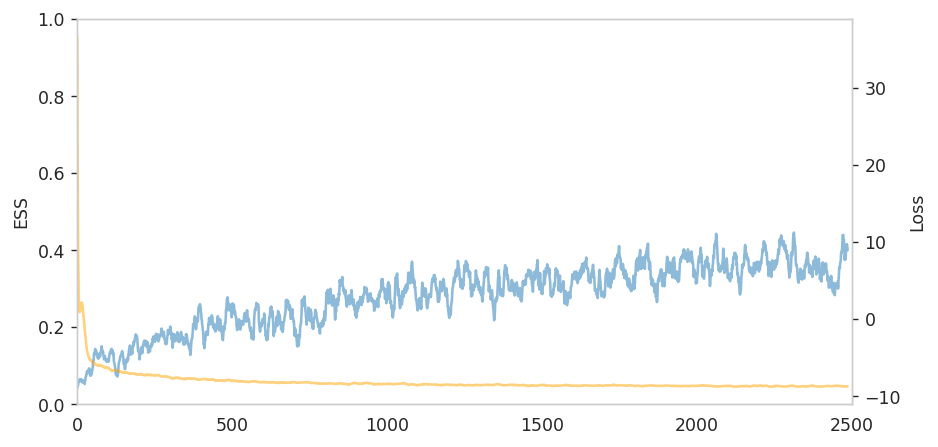

== Era 0 | Epoch 0 metrics ==
	loss 207.635
	logp -264.479
	logq -56.8442
	ess 0.015625
== Era 1 | Epoch 0 metrics ==
	loss -0.0839333
	logp -16.8045
	logq -16.8884
	ess 0.0924834
== Era 2 | Epoch 0 metrics ==
	loss -6.78759
	logp -11.9234
	logq -18.711
	ess 0.127396
== Era 3 | Epoch 0 metrics ==
	loss -7.27312
	logp -11.9071
	logq -19.1803
	ess 0.159158
== Era 4 | Epoch 0 metrics ==
	loss -7.67416
	logp -11.6838
	logq -19.3579
	ess 0.179355
== Era 5 | Epoch 0 metrics ==
	loss -7.86716
	logp -11.5638
	logq -19.4309
	ess 0.21189
== Era 6 | Epoch 0 metrics ==
	loss -8.06292
	logp -11.4868
	logq -19.5497
	ess 0.219936
== Era 7 | Epoch 0 metrics ==
	loss -8.19564
	logp -11.3889
	logq -19.5846
	ess 0.223926
== Era 8 | Epoch 0 metrics ==
	loss -8.23039
	logp -11.3516
	logq -19.582
	ess 0.216062
== Era 9 | Epoch 0 metrics ==
	loss -8.3569
	logp -11.2825
	logq -19.6394
	ess 0.273863
== Era 10 | Epoch 0 metrics ==
	loss -8.34248
	logp -11.2865
	logq -19.6289
	ess 0.272031
== Era 11 | Epoch 0 me

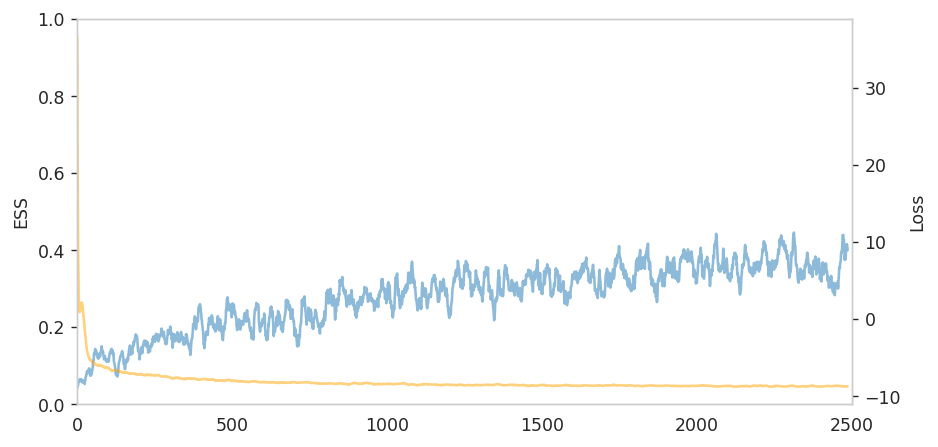

In [ ]:
# Training specifications
base_lr = .001
optimizer = torch.optim.Adam(model['layers'].parameters(), lr=base_lr)
use_pretrained = False

# if not pretrained, then use the code below. If you have pretrained weights for similar lattice field configurations, that can be loaded here too.
N_era = 25
N_epoch = 100
batch_size = 64
print_freq = N_epoch
plot_freq = 1

history = {
    'loss' : [],
    'logp' : [],
    'logq' : [],
    'ess' : []
}

if not use_pretrained:
    [plt.close(plt.figure(fignum)) for fignum in plt.get_fignums()] # close all existing figures
    live_plot = init_live_plot()

    for era in range(N_era):
        for epoch in range(N_epoch):
            train_step(model, phi4_action, calc_dkl, optimizer, history)

            if epoch % print_freq == 0:
                print_metrics(history, avg_last_N_epochs=print_freq)

            if epoch % plot_freq == 0:
                update_plots(history, **live_plot)
else:
    print('Skipping training')


# next, the weights are serialized to distribute the model in this state
print('Model weights blob:\n===')
serialized_model = io.BytesIO()
torch.save(model['layers'].state_dict(), serialized_model)
print(base64.b64encode(serialized_model.getbuffer()).decode('utf-8'))
print('===')

## Now that we have a trained model at hand, let us draw samples from this, and check the quality.
* We plot the drawn samples below. These have regions with smoother, largely correlated fluctuations, in comparison to untrained priors.
* Output distribution $Q[\phi']$ is an approximate one, and can be used for reweighting or resampling.
* As we do not know what $1/Z$ is, there is a finite offset between approximate and true actions $- \log Q[\phi']$ and $S_{\text{lattice}}[\phi']$.

**Exercise 8: Find an expression for the offset between approximate and target actions $- \log Q[\phi']$ and $S_{\text{lattice}}[\phi']$. Use it to correct the approximate action, call it $-\log Q'[\phi']$. Plot and compare $-\log Q'[\phi']$ against target action $S_{\text{lattice}}[\phi']$.**
---

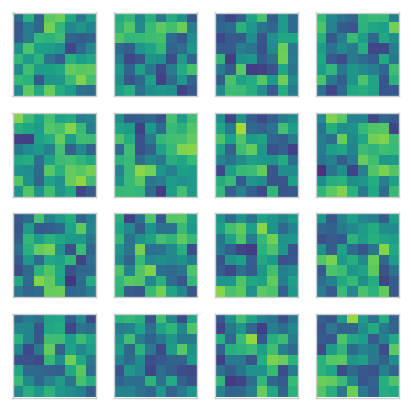

In [ ]:
# we draw samples from this trained weight distribution and plot below
torch_x, torch_logq = apply_flow_to_prior(prior, layers, batch_size=1024)
x = grab(torch_x)

fig, ax = plt.subplots(4,4, dpi=125, figsize=(4,4))
for i in range(4):
    for j in range(4):
        ind = i*4 + j
        ax[i,j].imshow(np.tanh(x[ind]), vmin=-1, vmax=1, cmap='viridis')
        ax[i,j].axes.xaxis.set_visible(False)
        ax[i,j].axes.yaxis.set_visible(False)
plt.show()

## Solution to Exercise 8 (to be removed before GitHub upload).

slope 1 linear regression S = S_eff + -8.7196


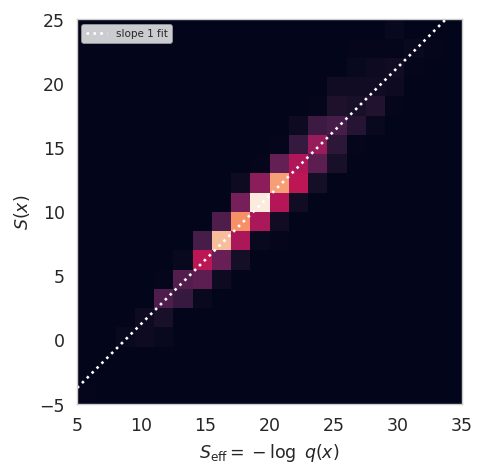

In [ ]:
S_eff = -grab(torch_logq)
S = grab(phi4_action(torch_x))
# the finite offset between target and approximate actions are evaluated below
fit_b = np.mean(S) - np.mean(S_eff)
print(f'slope 1 linear regression S = S_eff + {fit_b:.4f}')
fig, ax = plt.subplots(1,1, dpi=125, figsize=(4,4))
ax.hist2d(S_eff, S, bins=20, range=[[5, 35], [-5, 25]])
ax.set_xlabel(r'$S_{\mathrm{eff}} = -\log~q(x)$')
ax.set_ylabel(r'$S(x)$')
ax.set_aspect('equal')
xs = np.linspace(5, 35, num=4, endpoint=True)
ax.plot(xs, xs + fit_b, ':', color='w', label='slope 1 fit') # we use the finite offset to get a closer match between target and approximate actions of priors.
plt.legend(prop={'size': 6})
plt.show()

References
* [Introduction to Normalizing Flows for Lattice Field Theory](https://arxiv.org/abs/2101.08176) by Boyda et. al.
* [Learning Lattice Quantum Field Theories with Equivariant Continuous Flows](https://arxiv.org/abs/2207.00283) by Gerdes et. al.
* [Quantum Field Theory](https://www.cambridge.org/highereducation/books/quantum-field-theory/718DD037728FB3745F48A40A6D9A8A1C#overview), Mark Srednicki, Cembridge University Press, Chapter 9.
* [Quantum Field on a Lattice](https://www.cambridge.org/core/books/quantum-fields-on-a-lattice/4401A88CD232B0AEF1409BF6B260883A), Istvan Montvay and Gernot Munster, Cambridge University Press, Chapters 1, 2.